In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer as DV
import seaborn as sns

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
abalone = pd.read_csv('abalone.data', 
                   names= ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
encoder = DV(sparse = False)
encoded_sign_abalone = encoder.fit_transform(abalone[['Sex']].T.to_dict().values())
print(encoded_sign_abalone[:10])

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [5]:
abalone = abalone.drop('Sex',1)
abalone_encoded = pd.concat([pd.DataFrame(encoded_sign_abalone,columns=['Female','Infant','Male']),abalone],axis = 1)
abalone_encoded.head()

,Female,Infant,Male,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
abalone_encoded.to_csv('abalone_preprocessed.csv')

In [8]:
sex_addiction = pd.concat([pd.DataFrame(encoded_sign_abalone,columns=['Female','Infant','Male']),abalone[['Rings']]],axis=1)

In [9]:
abalone_names = abalone_encoded.columns
print(abalone_names)

Index(['Female', 'Infant', 'Male', 'Length', 'Diameter', 'Height',
       'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',
       'Rings'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc9dc9f10>]],
      dtype=object)

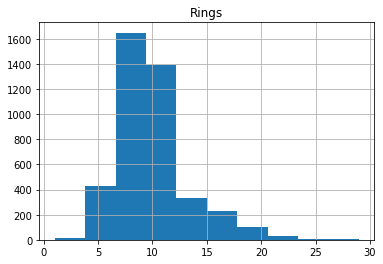

In [10]:
abalone.hist(column='Rings')

Большая часть экзэмпляров морского ушка имеет около 10 колец.

In [11]:
target_names = ['Female', 'Infant', 'Male']
abalone_names = abalone_names.drop(target_names, 1)
abalone_names = abalone_names.drop('Rings', 1)

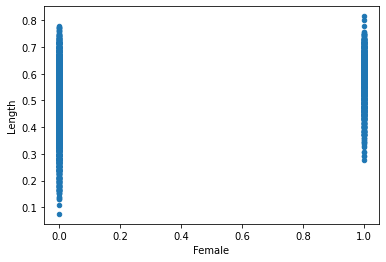

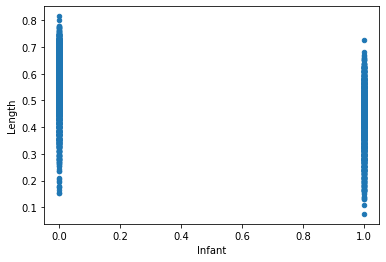

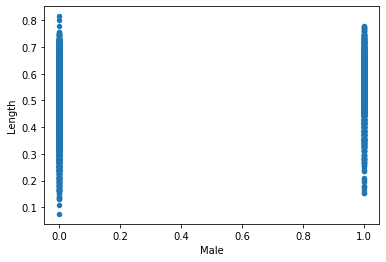

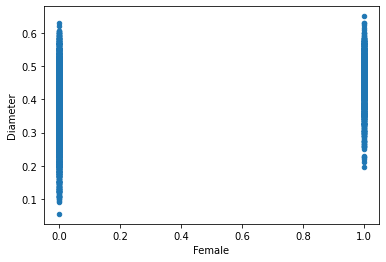

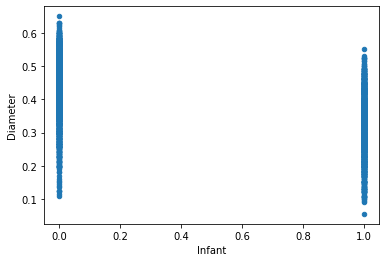

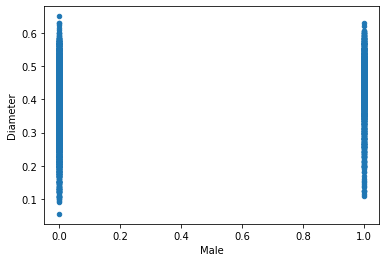

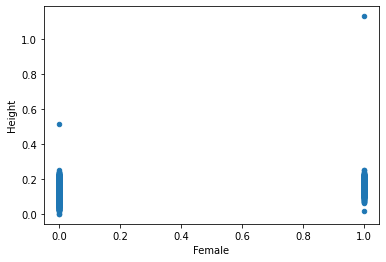

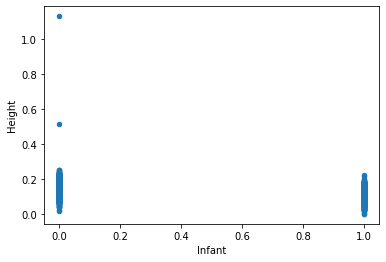

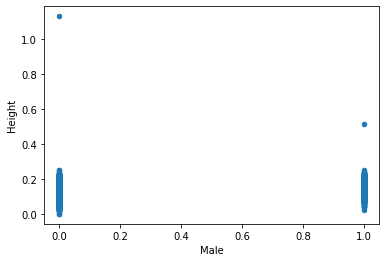

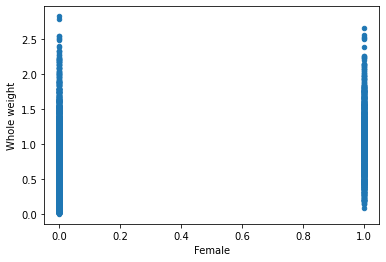

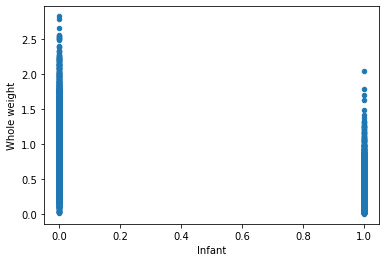

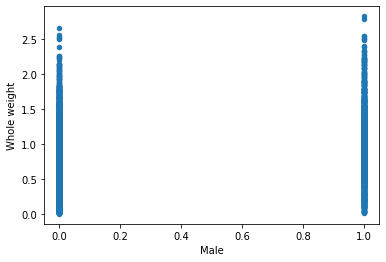

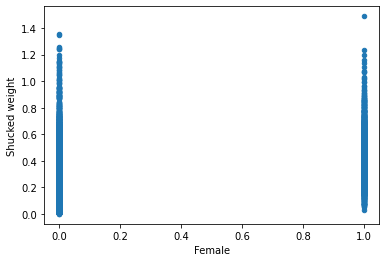

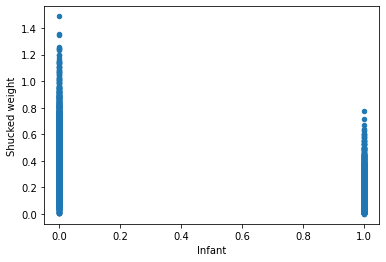

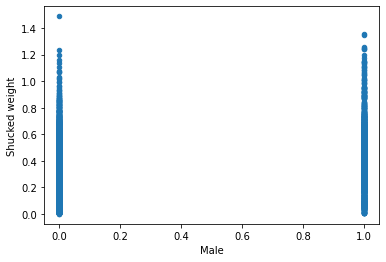

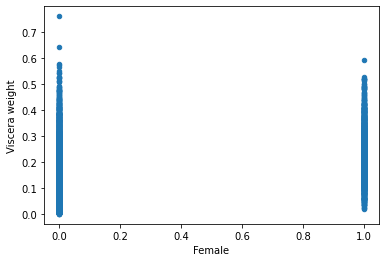

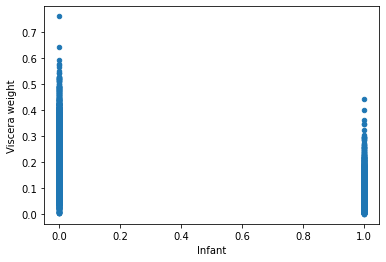

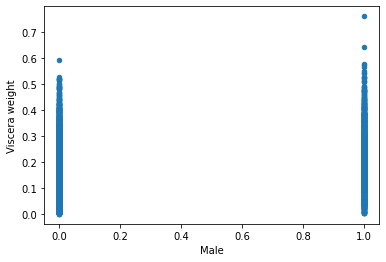

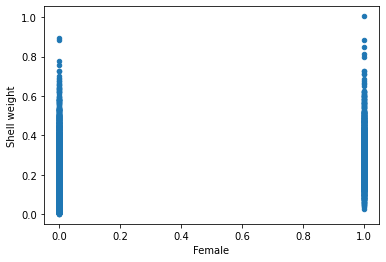

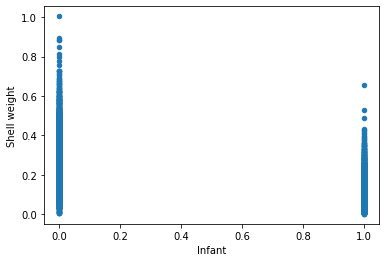

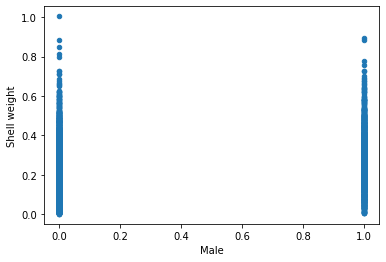

In [13]:
for i in abalone_names:
    for j in target_names:
        abalone_encoded.plot(x = j,y= i,kind='scatter')
        show()

Морское ушко женского пола в основном превосходит в размерах другие экземпляры. Но уступает в массе ушкам мужского пола.

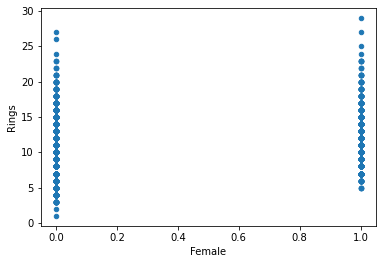

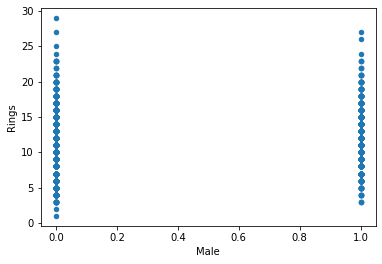

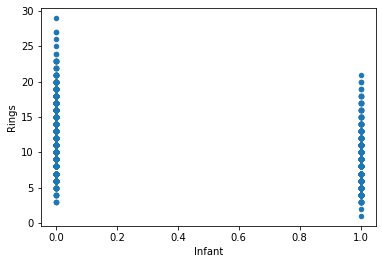

In [14]:
sex_addiction.plot(x='Female', y='Rings', kind='scatter')
sex_addiction.plot(x='Male', y='Rings', kind='scatter')
sex_addiction.plot(x='Infant', y='Rings', kind='scatter')
plt.show()

У особей женского пола зафиксировано большее количество колец. Рекордные показатели также принадлежат морским ушкам женского пола.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

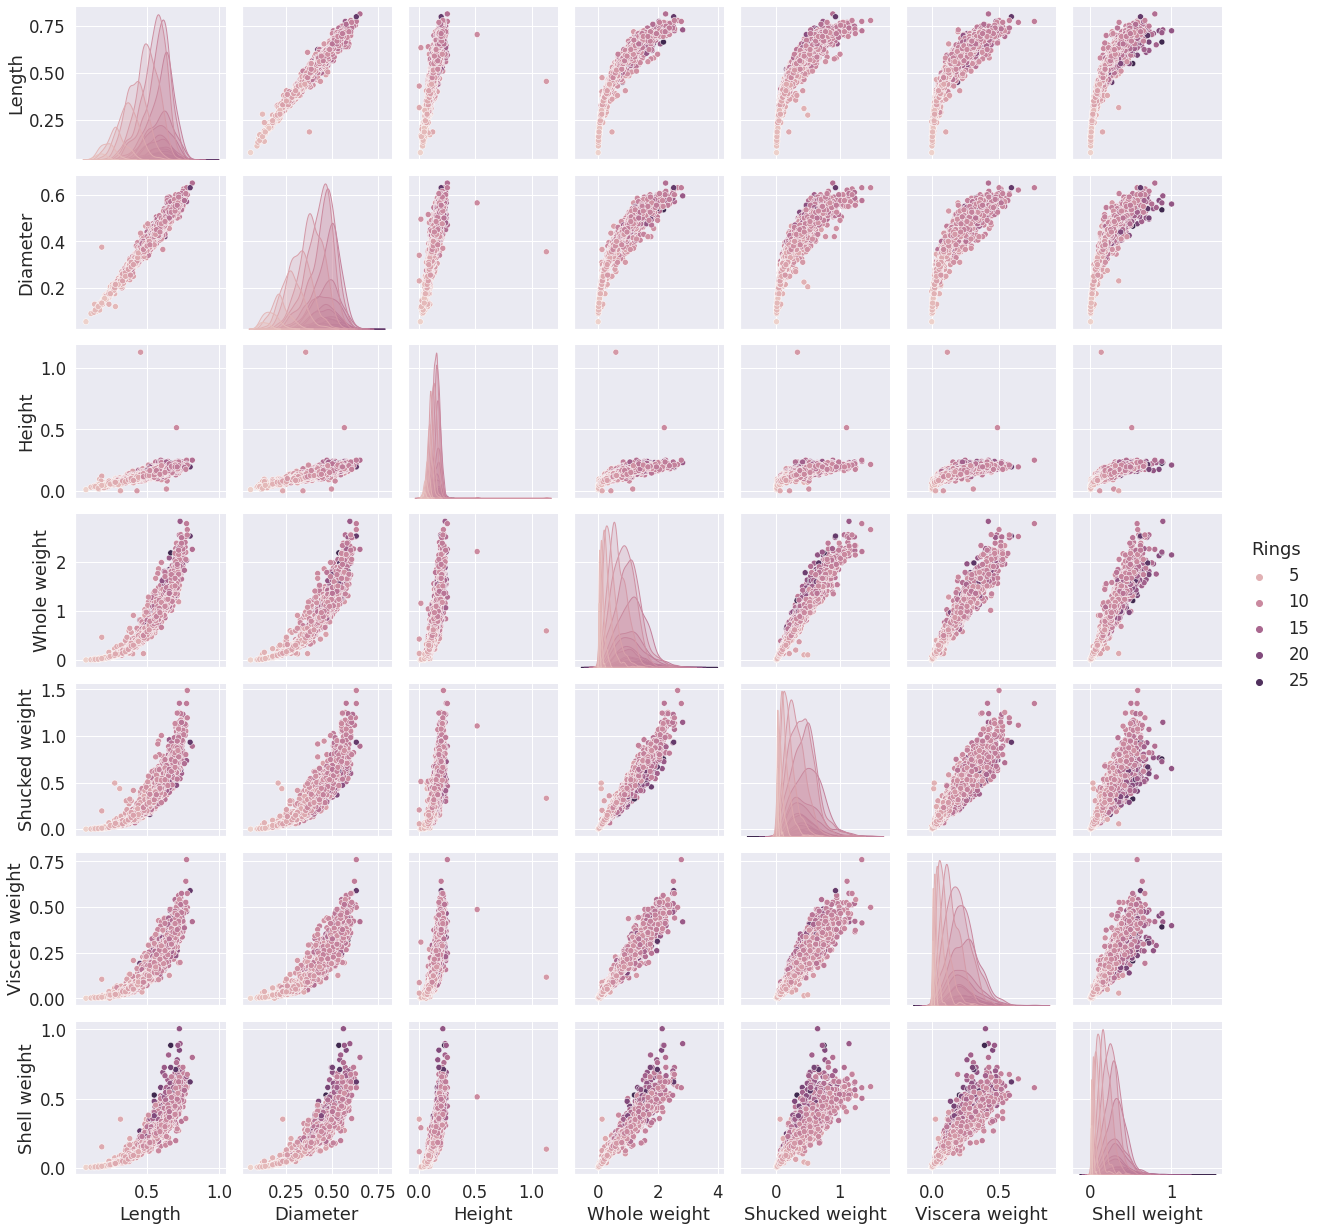

In [15]:
sns.set(font_scale = 1.5)
sns.pairplot(abalone, hue = 'Rings')

Зачастую, экзэмпляры с большим размером и массой оказываются самыми старыми. Есть большие особи с малым количеством колец.

In [33]:
concrete = pd.read_excel('concrete.xls', names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water','Superplasticizer',
                                                  'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength'])
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [34]:
concrete.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [35]:
concrete.to_csv('concrete_preprocessed.csv')

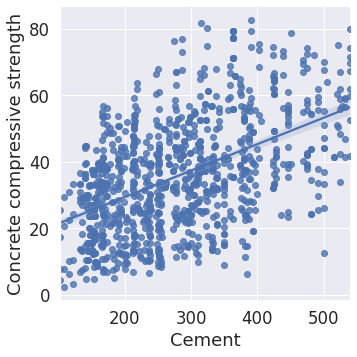

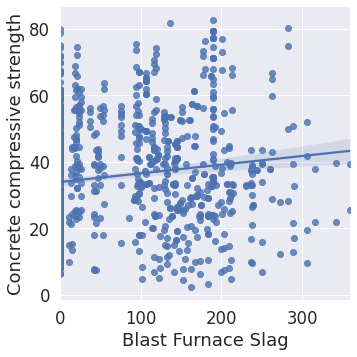

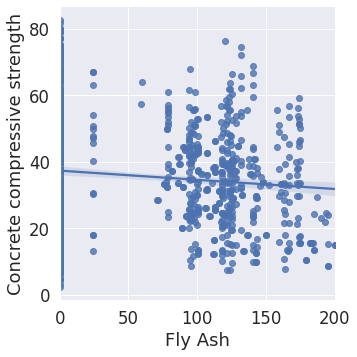

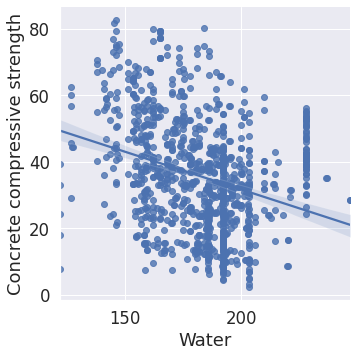

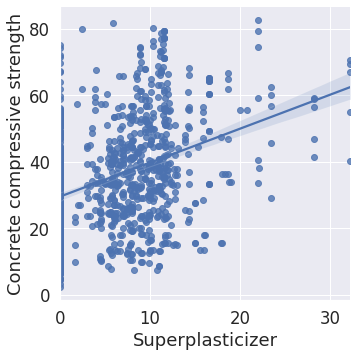

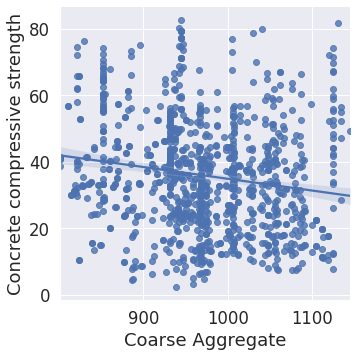

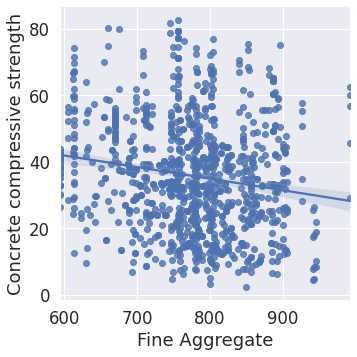

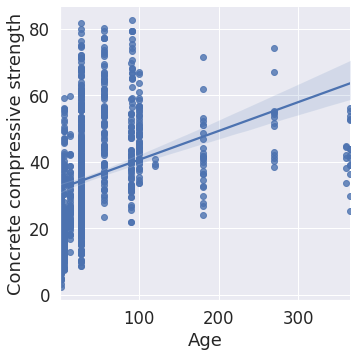

In [37]:
for i in concrete.columns[:-1]:
  sns.lmplot(x = i,
          y= concrete.columns[-1], data=concrete);
         #print(i)

Прочность бетона на сжатие увеличивается при увеличении содержания цемента,доменного шлака, суперпластификатора и после прохожденияы большего количества времени. Прочность бетона немного снижается при увеличении концентрации летучей золы, грубого и мелкого заполнителей. Значительное снижение проявляется придобавлении большего количества воды.